In [1]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## less Important
from functools import partial
import os
from scipy import stats
import missingno as msno
import joblib
import tarfile
import shutil
import urllib

## Sklearn
from sklearn import datasets
## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
## Metrics
from sklearn.metrics import accuracy_score

## tensorflow & Keras
import tensorflow as tf    ## i will use tf for every thing and for keras using tf.keras
import tensorflow_datasets as tfds

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

## Apply CNN
`Fashion MNSIT`

In [3]:
### Building a Sequential API for multiclass Classification

## loading the Fashion MNIST 
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

## show shapes, dtypes and transfer datatypes to (float32, enough for NN)
## and rescale the inputs to be from (0-1)

X_train_full = (X_train_full/255.0).astype('float32')
y_train_full = y_train_full.astype('int32')

X_test = (X_test/255.0).astype('float32')
y_test = y_test.astype('int32')

## split train to train & val
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, 
                                                  test_size=0.1, shuffle=True)


print('X_train_full shape =>', X_train_full.shape)
print('y_train_full shape =>', y_train_full.shape)
print('==='*15)
print('X_train shape =>', X_train.shape)
print('y_train shape =>', y_train.shape)
print('==='*15)
print('X_val shape =>', X_val.shape)
print('y_val shape =>', y_val.shape)
print('==='*15)
print('X_test shape =>', X_test.shape)
print('y_test shape =>', y_test.shape)
print('==='*25)
print('X_train , y_train -- dtypes =>', (X_train.dtype, y_train.dtype))
print('X_val , y_val -- dtypes =>', (X_val.dtype, y_val.dtype))
print('X_test , y_test -- dtypes =>', (X_test.dtype, y_test.dtype))

X_train_full shape => (60000, 28, 28)
y_train_full shape => (60000,)
X_train shape => (54000, 28, 28)
y_train shape => (54000,)
X_val shape => (6000, 28, 28)
y_val shape => (6000,)
X_test shape => (10000, 28, 28)
y_test shape => (10000,)
X_train , y_train -- dtypes => (dtype('float32'), dtype('int32'))
X_val , y_val -- dtypes => (dtype('float32'), dtype('int32'))
X_test , y_test -- dtypes => (dtype('float32'), dtype('int32'))


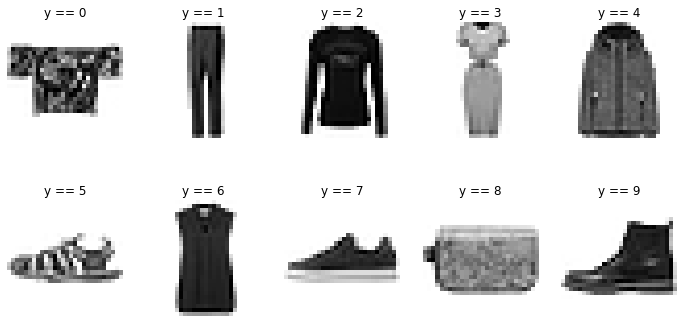

In [4]:
target_only_plot = pd.DataFrame(y_train, columns=['target'])

## get first index only i need only one unique value to test to 
## what this number belong to what photo (i hope you understand me)
## although the images are diffrent for each class_name < like (coats have diffrent images)
## but still have the same number of target, that what i only want

img_indicies = {}

for i in range(len(np.unique(y_train))):
    img_indicies[i] = target_only_plot[target_only_plot['target']==i].index[0]   

    
keys = list(img_indicies.keys())

fig, ax = plt.subplots(2, 5, figsize=(12, 6))

plt.sca(ax[0,0])
plt.imshow(X_train[img_indicies[0]], cmap='binary')
plt.title(f'y == {keys[0]}')
plt.axis('off')
plt.sca(ax[0,1])
plt.imshow(X_train[img_indicies[1]], cmap='binary')
plt.title(f'y == {keys[1]}')
plt.axis('off')
plt.sca(ax[0,2])
plt.imshow(X_train[img_indicies[2]], cmap='binary')
plt.title(f'y == {keys[2]}')
plt.axis('off')
plt.sca(ax[0,3])
plt.imshow(X_train[img_indicies[3]], cmap='binary')
plt.title(f'y == {keys[3]}')
plt.axis('off')
plt.sca(ax[0,4])
plt.imshow(X_train[img_indicies[4]], cmap='binary')
plt.title(f'y == {keys[4]}')
plt.axis('off')

###################
plt.sca(ax[1,0])
plt.imshow(X_train[img_indicies[5]], cmap='binary')
plt.title(f'y == {keys[5]}')
plt.axis('off')
plt.sca(ax[1,1])
plt.imshow(X_train[img_indicies[6]], cmap='binary')
plt.title(f'y == {keys[6]}')
plt.axis('off')
plt.sca(ax[1,2])
plt.imshow(X_train[img_indicies[7]], cmap='binary')
plt.title(f'y == {keys[7]}')
plt.axis('off')
plt.sca(ax[1,3])
plt.imshow(X_train[img_indicies[8]], cmap='binary')
plt.title(f'y == {keys[8]}')
plt.axis('off')
plt.sca(ax[1,4])
plt.imshow(X_train[img_indicies[9]], cmap='binary')
plt.title(f'y == {keys[9]}')
plt.axis('off')
plt.show()

In [5]:
### you can now know for each target value belong to what class
class_names = ['T_Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle_Boot']


## you can now work like this

print('y_train in row 1 =>', y_train[0])
print('get its corresponding class =>', class_names[y_train[0]])

y_train in row 1 => 5
get its corresponding class => Sandal


### CNN architecture

In [6]:
### i will use conv2d , so i will extend dimension to be (batch_size, 28, 28, 1)
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]
print('X_train =>', X_train.shape)
print('X_val =>', X_val.shape)
print('X_test =>', X_test.shape)  ## what i need

X_train => (54000, 28, 28, 1)
X_val => (6000, 28, 28, 1)
X_test => (10000, 28, 28, 1)


In [7]:
## Define the Model
model_fashion = tf.keras.models.Sequential()

## add layers
## CONVOLUTION AND POOLING LAYERS
model_fashion.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, 
                                         strides=1, padding='same',
                                         activation='elu', 
                                         kernel_initializer='he_normal', 
                                         input_shape=[28, 28, 1]))
model_fashion.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model_fashion.add(tf.keras.layers.Conv2D(64, 3, strides=1, padding='same',
                                         activation='elu', kernel_initializer='he_normal'))
model_fashion.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model_fashion.add(tf.keras.layers.Conv2D(128, 3, strides=1, padding='same',
                                         activation='elu', kernel_initializer='he_normal'))
model_fashion.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model_fashion.add(tf.keras.layers.Conv2D(256, 3, strides=1, padding='same',
                                         activation='elu', kernel_initializer='he_normal'))
model_fashion.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

## DENSE LAYERS
model_fashion.add(tf.keras.layers.Flatten())
model_fashion.add(tf.keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'))
model_fashion.add(tf.keras.layers.Dropout(0.3))    ## add a dropout
model_fashion.add(tf.keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'))
model_fashion.add(tf.keras.layers.Dropout(0.3))    ## add a dropout
model_fashion.add(tf.keras.layers.Dense(10, activation='softmax'))

model_fashion.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 256)         2

In [8]:
## Prepare the Hyperparameters
n_epochs = 20
n_batch_size = 32
s = n_epochs * len(X_train) // n_batch_size
## create Learning_rate with Exponential Scheduling
lr_exponential = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, 
                                                                decay_rate=0.1, decay_steps=s)
optimizer_exp = tf.keras.optimizers.SGD(learning_rate=lr_exponential)
## complile the Model
model_fashion.compile(loss='sparse_categorical_crossentropy', 
                      optimizer=optimizer_exp, 
                      metrics=['accuracy'])

early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
## fit the Model
histry = model_fashion.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs,
                          batch_size=n_batch_size, callbacks=[early_stopp])

Epoch 1/20
1688/1688 [==============================] - 33s 14ms/step - loss: 0.6044 - accuracy: 0.7850 - val_loss: 0.3692 - val_accuracy: 0.8652
Epoch 2/20
1688/1688 [==============================] - 22s 13ms/step - loss: 0.3935 - accuracy: 0.8601 - val_loss: 0.3554 - val_accuracy: 0.8702
Epoch 3/20
1688/1688 [==============================] - 21s 12ms/step - loss: 0.3385 - accuracy: 0.8792 - val_loss: 0.3079 - val_accuracy: 0.8903
Epoch 4/20
1688/1688 [==============================] - 24s 14ms/step - loss: 0.3037 - accuracy: 0.8923 - val_loss: 0.2877 - val_accuracy: 0.8980
Epoch 5/20
1688/1688 [==============================] - 22s 13ms/step - loss: 0.2798 - accuracy: 0.8996 - val_loss: 0.2880 - val_accuracy: 0.8983
Epoch 6/20
1688/1688 [==============================] - 22s 13ms/step - loss: 0.2617 - accuracy: 0.9066 - val_loss: 0.2927 - val_accuracy: 0.8935
Epoch 7/20
1688/1688 [==============================] - 26s 15ms/step - loss: 0.2473 - accuracy: 0.9111 - val_loss: 0.2614 -

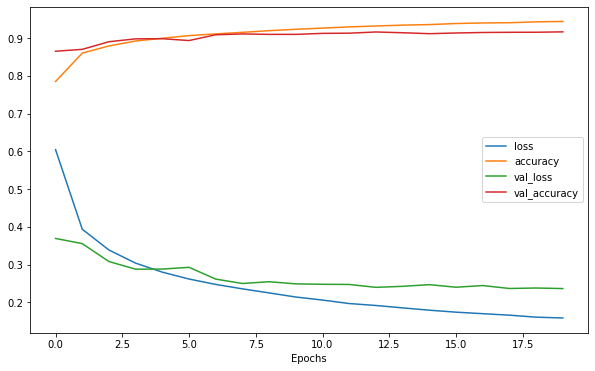

In [9]:
## Visualizing
pd.DataFrame(histry.history).plot(figsize=(10, 6))
plt.xlabel('Epochs');

In [10]:
## Evaluate on test_set
val_test, acc_test = model_fashion.evaluate(X_test, y_test, verbose=0)
print('val_test =>', val_test)
print('acc_test =>', acc_test)   ## Not Bad!

val_test => 0.2578429579734802
acc_test => 0.9121999740600586


## Transfer Learning
**Pretrained Model for Image ClassificationX**
1. `LeNet`
2. `AlexNet`
3. `GoogleNet 'Inception'`
4. `VGGNet`
5. `ResNet`
6. `Xception`
7. `SeNET`

## Using ResNet Pretrained Models from Keras

`Note that each Model should be processed with the same training dataset that the model trained on, so each model comes with it (preprocess_input) to preprocess your data before evaluate it`

In [11]:
## reload the Model (laod the weights of ImageNet DataSet)
model_resnet = tf.keras.applications.resnet50.ResNet50(weights='imagenet')

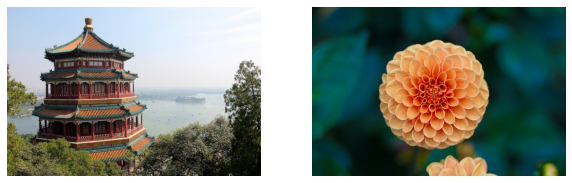

In [12]:
## Loading two photos
china_img = datasets.load_sample_image('china.jpg')
flower_img = datasets.load_sample_image('flower.jpg')

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
plt.sca(ax[0])
plt.imshow(china_img, cmap='binary')
plt.axis('off')
plt.sca(ax[1])
plt.imshow(flower_img, cmap='binary')
plt.axis('off');    
## these are two images, and i will evaluate Model on them to see what are the results

In [13]:
## first of all , you should process the images with the same method the ResNet training data
## ResNet expects 224*224 pixels, and to be processed with the (process_input) Method

## firstly: resizing the Images 
## concatenate both images
images = np.array([china_img, flower_img])
images_resized =  tf.image.resize(images, [224, 224])

## Preprocess
images_process = tf.keras.applications.resnet50.preprocess_input(images_resized)

## Now we are ready to evaluate
y_pred_proba_all_calsses = model_resnet.predict(images_process)

In [14]:
### you can get the max. probabilty classes
top_proba_K = tf.keras.applications.resnet50.decode_predictions(preds=y_pred_proba_all_calsses, 
                                                                top=4)
for idx in range(len(images_resized)):
    print(f'## Image {idx}')
    for clas_idx , class_name, class_prob in top_proba_K[idx]:
        print(f'{idx} - {class_name} - {class_prob*100}')
    print()   
## Model predicts not correct , but the correct answer is from the top 4 probabilities
## Not Bad!

## Image 0
0 - bell_cote - 82.34872221946716
0 - palace - 6.751643866300583
0 - monastery - 4.18834313750267
0 - castle - 3.1552106142044067

## Image 1
1 - honeycomb - 49.82836842536926
1 - stinkhorn - 33.954888582229614
1 - bee - 4.346391186118126
1 - daisy - 3.2279282808303833



## Pretrained Models for Other Dataset Using 'Xception'

In [15]:
### load some dummy dataset

## as_supervised ==> for labels
## with_info ==> for information
dataset, info = tfds.load('tf_flowers', as_supervised=True, with_info=True)
dataset_size = info.splits['train'].num_examples   ## size of dataset
print('dataset_size =>', dataset_size)
classes_names = info.features['label'].names
print('classes_names =>', classes_names)
num_classes = info.features['label'].num_classes
print('num_classes =>', num_classes)

dataset_size => 3670
classes_names => ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
num_classes => 5


In [16]:
### tfds contains a split to split the dataset
## 10% for test, 15% for val, 75 for train
test_split, val_split, train_split = tfds.load('tf_flowers', as_supervised=True, 
                                               split=['train[:10%]', 'train[10%:25%]', 'train[25%:]'])

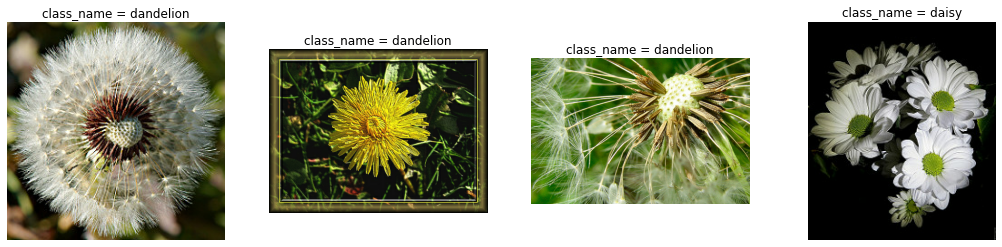

In [17]:
## show some images
fig, ax = plt.subplots(1, 4, figsize=(18, 4))
idx = 0
for image, label in train_split.take(4):
    plt.sca(ax[idx])
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.title(f'class_name = {classes_names[label]}')
    idx+=1

### Preprocess images

In [18]:
### preprocess function
def preprocess_images(image, label):
    ## resize the images and pass them to preprocss_input of the Model
    image_resized = tf.image.resize(image, [224, 224])
    image_final = tf.keras.applications.xception.preprocess_input(image_resized)
    return image_final, label

## apply this function to all datasets
batch_size = 32
train_set = train_split.map(preprocess_images).batch(batch_size).prefetch(1)
val_set = val_split.map(preprocess_images).batch(batch_size).prefetch(1)
test_set = test_split.map(preprocess_images).batch(batch_size).prefetch(1)

### Get the Model

In [19]:
## Loading the Model Xception
## i will get conv_base only, and i will not include the (top dense layers)
conv_base_xception = tf.keras.applications.xception.Xception(include_top=False, weights='imagenet')

## making GlobalAvgPooling ==> take the average of each feature Map
avg = tf.keras.layers.GlobalAveragePooling2D()(conv_base_xception.output)
## get the modified output of number of classes according to our dummy dataset
output = tf.keras.layers.Dense(num_classes, activation='softmax')(avg)
## make the final Model
model_final = tf.keras.Model(inputs=[conv_base_xception.input], outputs=[output])

In [20]:
### freezing the Model only for the first epochs, lets take for the first 5 then unfreeze it
conv_base_xception.trainable = False

optimizer_lr_power = tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, 
                                             nesterov=True, decay=1e-4)
model_final.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=optimizer_lr_power, 
                    metrics=['accuracy'])

history_first_5 = model_final.fit(train_set, validation_data=(val_set), epochs=5)

Epoch 1/5
86/86 [==============================] - 64s 662ms/step - loss: 1.1500 - accuracy: 0.8041 - val_loss: 0.9813 - val_accuracy: 0.8348
Epoch 2/5
86/86 [==============================] - 54s 630ms/step - loss: 0.5162 - accuracy: 0.9015 - val_loss: 1.1382 - val_accuracy: 0.8294
Epoch 3/5
86/86 [==============================] - 55s 642ms/step - loss: 0.2641 - accuracy: 0.9346 - val_loss: 1.1163 - val_accuracy: 0.8421
Epoch 4/5
86/86 [==============================] - 55s 647ms/step - loss: 0.1857 - accuracy: 0.9495 - val_loss: 1.1666 - val_accuracy: 0.8240
Epoch 5/5
86/86 [==============================] - 47s 552ms/step - loss: 0.1083 - accuracy: 0.9669 - val_loss: 1.1811 - val_accuracy: 0.8294


In [21]:
### unfreezing the Model after some epochs, and decrease learning_rate
conv_base_xception.trainable = True
optimizer_lr_power = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, 
                                             nesterov=True, decay=1e-4)
model_final.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=optimizer_lr_power, 
                    metrics=['accuracy'])

history_second = model_final.fit(train_set, validation_data=(val_set), epochs=7)

Epoch 1/7
86/86 [==============================] - 113s 1s/step - loss: 0.4135 - accuracy: 0.8695 - val_loss: 0.9208 - val_accuracy: 0.8040
Epoch 2/7
86/86 [==============================] - 107s 1s/step - loss: 0.0684 - accuracy: 0.9786 - val_loss: 0.7363 - val_accuracy: 0.8258
Epoch 3/7
86/86 [==============================] - 108s 1s/step - loss: 0.0288 - accuracy: 0.9902 - val_loss: 0.4420 - val_accuracy: 0.8820
Epoch 4/7
86/86 [==============================] - 109s 1s/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.3595 - val_accuracy: 0.9201
Epoch 5/7
86/86 [==============================] - 106s 1s/step - loss: 5.2668e-04 - accuracy: 1.0000 - val_loss: 0.3854 - val_accuracy: 0.9220
Epoch 6/7
86/86 [==============================] - 110s 1s/step - loss: 1.3396e-04 - accuracy: 1.0000 - val_loss: 0.4122 - val_accuracy: 0.9220
Epoch 7/7
86/86 [==============================] - 109s 1s/step - loss: 9.2750e-05 - accuracy: 1.0000 - val_loss: 0.4321 - val_accuracy: 0.9220


In [22]:
## Evaluate on the test_set
test_loss, test_acc = model_final.evaluate(test_set, verbose=0)
print('test_loss =>', test_loss)
print('test_acc =>', test_acc)

test_loss => 0.41067853569984436
test_acc => 0.9346048831939697


## Localization and Object Detection
`We can use the same model to get the location of the elements (regression task) by getting (height, width, and two centers) so we will only increase the output for 4elements`

In [80]:
## get the Model
base_model = tf.keras.applications.xception.Xception(weights="imagenet",
                                                     include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output = tf.keras.layers.Dense(num_classes, activation="softmax")(avg)

## for localization (regression task ==> 4 elements)
loc_output = tf.keras.layers.Dense(4)(avg)

## concatenate the model
model = tf.keras.models.Model(inputs=base_model.input,
                             outputs=[class_output, loc_output])

## compile the Model
conv_base_xception.trainable = True
optimizer_lr_power = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, 
                                             nesterov=True, decay=1e-4)
model.compile(loss=["sparse_categorical_crossentropy", "mse"],
              loss_weights=[0.8, 0.2],   # depends on what you care most about (calssification)
              optimizer=optimizer_lr_power, metrics=["accuracy"])

In [81]:
## we firstly add random boxes 
def add_random_bounding_boxes(images, labels):
    fake_bboxes = tf.random.uniform([tf.shape(images)[0], 4])
    return images, (labels, fake_bboxes)

fake_train_set = train_set.take(5).repeat(2).map(add_random_bounding_boxes)
fake_val_set = val_set.take(5).repeat(2).map(add_random_bounding_boxes)

In [82]:
history_first = model.fit(fake_train_set, steps_per_epoch=5, epochs=2, 
                          validation_data=fake_val_set, validation_steps=5)

Epoch 1/2
5/5 [==============================] - 12s 2s/step - loss: 1.3362 - dense_12_loss: 1.5910 - dense_13_loss: 0.3171 - dense_12_accuracy: 0.2812 - dense_13_accuracy: 0.2500 - val_loss: 1.1599 - val_dense_12_loss: 1.3894 - val_dense_13_loss: 0.2422 - val_dense_12_accuracy: 0.4875 - val_dense_13_accuracy: 0.2375
Epoch 2/2
5/5 [==============================] - 7s 1s/step - loss: 0.9343 - dense_12_loss: 1.1217 - dense_13_loss: 0.1844 - dense_12_accuracy: 0.8562 - dense_13_accuracy: 0.2812 - val_loss: 0.9368 - val_dense_12_loss: 1.0842 - val_dense_13_loss: 0.3475 - val_dense_12_accuracy: 0.6000 - val_dense_13_accuracy: 0.2250


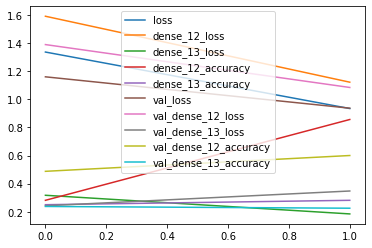

In [83]:
pd.DataFrame(history_first.history).plot();